![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [58]:
# Imported libraries
library(tidyverse, warn.conflicts = FALSE)
library(data.table, warn.conflicts = FALSE)
library(ggplot2, warn.conflicts = FALSE)

In [59]:
# set working directory
setwd("/work/files/workspace/data")

In [60]:
# load datasets
yearly_deaths_by_clinic <- fread("yearly_deaths_by_clinic.csv", stringsAsFactors = TRUE)
head(yearly_deaths_by_clinic)

monthly_deaths <- fread("monthly_deaths.csv")
head(monthly_deaths)

year,births,deaths,clinic
<int>,<int>,<int>,<fct>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1


date,births,deaths
<IDate>,<int>,<int>
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2
1841-06-01,200,10


In [61]:
# Data prep
## check structure of data 
str(yearly_deaths_by_clinic)
str(monthly_deaths)

## check dimension of data
dim(yearly_deaths_by_clinic)
dim(monthly_deaths)

Classes ‘data.table’ and 'data.frame':	12 obs. of  4 variables:
 $ year  : int  1841 1842 1843 1844 1845 1846 1841 1842 1843 1844 ...
 $ births: int  3036 3287 3060 3157 3492 4010 2442 2659 2739 2956 ...
 $ deaths: int  237 518 274 260 241 459 86 202 164 68 ...
 $ clinic: Factor w/ 2 levels "clinic 1","clinic 2": 1 1 1 1 1 1 2 2 2 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	98 obs. of  3 variables:
 $ date  : IDate, format: "1841-01-01" "1841-02-01" ...
 $ births: int  254 239 277 255 255 200 190 222 213 236 ...
 $ deaths: int  37 18 12 4 2 10 16 3 4 26 ...
 - attr(*, ".internal.selfref")=<externalptr> 


[1] 12  4

[1] 98  3

In [62]:
# Data cleaning 
## check for missing data 
sum(is.na(yearly_deaths_by_clinic))
sum(is.na(monthly_deaths))

# check for duplicates
sum(duplicated(yearly_deaths_by_clinic))
sum(duplicated(monthly_deaths))

[1] 0

[1] 0

[1] 0

[1] 0

In [63]:
# Add proportions_death column to yearly_deaths_by_clinic using mutate function 
## Calculate proportion of deaths each year using yearly_deaths_by_clinic
yearly <- yearly_deaths_by_clinic %>% mutate(proportion_deaths = deaths/ births)

head(yearly)

year,births,deaths,clinic,proportion_deaths
<int>,<int>,<int>,<fct>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384


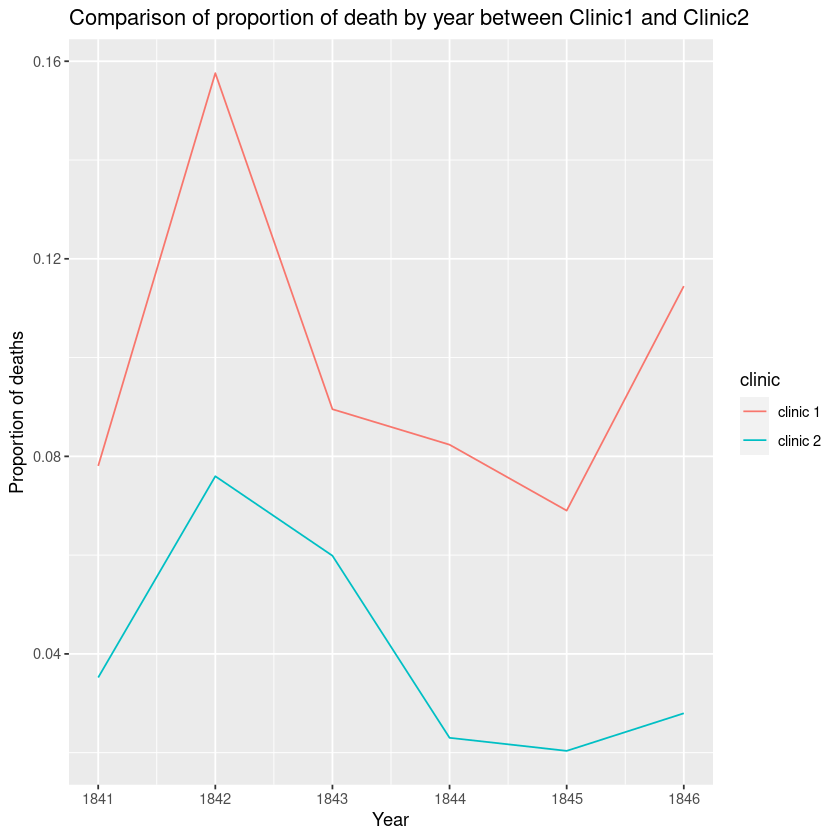

In [64]:
# Visualize porportional_deaths by year, group by clinic
ggplot(yearly, aes(x = year, y = proportion_deaths, group = clinic, color = clinic)) + geom_line() + ylab("Proportion of deaths") + xlab("Year") + ggtitle("Comparison of proportion of death by year between Clinic1 and Clinic2")

**Observation: **
1. Proportion of deaths in clinic 1 is higher than proportion of deaths in clinic 2.
2. Decreasing trend in proportional of death observed from 1842 to 1845.
3. Proportion of death shows increase from 1845 to 1846. 

Given that, Dr Semmelweis decreed on June 1st 1847, that everyone should wash their hands. 
Visualize the impact of handwashing in clinic 2, in which we have the mm/dd/yyyy values

First calculate the proportion of death in clinic 2 using the monthly_deaths table

In [65]:
# Add proportions_death column to monthly_deaths using mutate function 
## Calculate proportion of deaths each month using monthly
monthly <- monthly_deaths %>% mutate(proportions_deaths = deaths/ births)

Filter the dates after June 1st 1847, and use it to visualize the impact of handwashing on the proportions of death

In [66]:
# Make 1847-07-01 into date formate
start <- as.Date("1847-07-01")

# Add a new column to monthly names wash_started.
monthly <- monthly %>% 
			mutate(wash_started = date >= start)

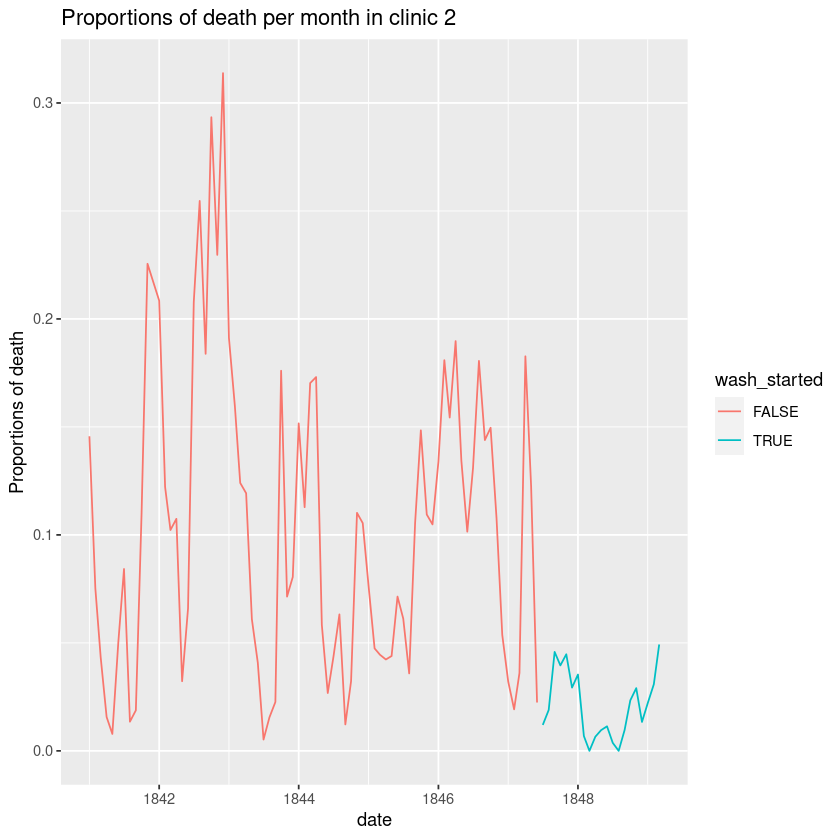

In [67]:
# Visualize proportion of death per month in clinic 2, color by dates before starting handwashing and after starting handwashing
ggplot(monthly, aes(x = date, y = proportions_deaths, color = wash_started)) + geom_line() + xlab("date") + ylab("Proportions of death") + ggtitle("Proportions of death per month in clinic 2")

**Observation:**
Based on visual observartion, post decreeing mandatory handwashing, the proportions of death significantly reduce.

To test of the statistical significance between proportion of death before the mandatory hand washing and proportion of death after the mandatory hand washing decree, we employ 2 sample t-test. 

Unpaired 2 sample t test can be used only when:
1) when 2 groups of samples, being compared, are normally distributed. This will be tested using Shapiro-Wilk test. 
2) and when variances of the 2 groups are equal. This will be checked using f-test

In [68]:
# Filter datapoints before 1847-07-01, and store as before. 
before <- monthly[monthly$date < start]

# Filter datapoints after 1847-07-0, and store as after.
after <- monthly[monthly$date > start]

In [69]:
# install ggpubr to use shapiro.test(), t.test()
install.packages("ggpubr", warn.conflicts = FALSE)

Installing package into ‘/home/repl/renv/library/R-4.2/x86_64-pc-linux-gnu’
(as ‘lib’ is unspecified)



In [70]:
# Use shapiro-wilk's test on the before dataset. 
shapiro.test(before$proportions_deaths)


	Shapiro-Wilk normality test

data:  before$proportions_deaths
W = 0.94358, p-value = 0.001916


**Observation:**
1. As p < 0.05, there is significant difference from normal distribution. Therefore for the data on the proportion of deaths before handwashing was mandatory is not normally distributed.

In [71]:
# Use shapiro-wilk's test on the after dataset. 
shapiro.test(after$proportions_deaths)


	Shapiro-Wilk normality test

data:  after$proportions_deaths
W = 0.93625, p-value = 0.2035


Observation:
1. As p > 0.05, it indicates that the distribution of data isn't significantly different from the normal distribution. We can assume normality.  

Since, the distribution of proportion of deaths before mandatory washing is not normally distributed, we should not use a parametric test such as t-test. Instead we will employ the use of a non-parametric test, Mann-Whitney U test. 

In [72]:
colnames(monthly)

[1] "date"               "births"             "deaths"            
[4] "proportions_deaths" "wash_started"

In [73]:
# calculate median of the 2 different groups; before wash_started and after wash_started
monthly %>% group_by(wash_started) %>% summarize(median = median(proportions_deaths), .groups = 'drop')

wash_started,median
<lgl>,<dbl>
FALSE,0.10486891
TRUE,0.01893939


In [74]:
# perform Mann-Whitney U test
result <- wilcox.test(monthly$proportions_deaths ~ monthly$wash_started, data = monthly)
result


	Wilcoxon rank sum test with continuity correction

data:  monthly$proportions_deaths by monthly$wash_started
W = 1449, p-value = 3.004e-08
alternative hypothesis: true location shift is not equal to 0


**Observation:** 
1. based on the result of Mann-Whitney U test, we can conclude there is statistical significance between before and after handwashing was mandatory on the proportion of deaths. 

**Conclusion:**
Handwashing decreased the proportional of deaths. 